## What is EDA - Exploratory Data Analysis

>In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods.

Amazon is one of the leading e-commerce site today. Online shopping has become a trend now a days. But, before shopping online, people usually go to check reviews of consumers on that particular product. According to a research more than 85% of online shopping depends on reviews of the consumers. So, it is necessary to analyze the flaws in low sale of any product. That's why in this project, we am going to explore and analyze Amazon product reviews, that can be used in other similar projects too. Without talking much, let's move towards coding.

#### _Dataset for project consists of different files according to the category of products. Thus, we will perform analysis on them separately one by one_

### Importing all required libraries

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid")
get_ipython().run_line_magic('matplotlib', 'inline')

#### Generic Methods to Read all json files in our project

In [2]:
def parse(path):
    raw_file = open(path, 'rb')
    for ele in raw_file:
        yield json.loads(ele)
        

def get_data_frame(path):
    idx = 0
    df_dict = {}
    for curr_dict in parse(path):
        df_dict[idx] = curr_dict
        idx += 1
    return pd.DataFrame.from_dict(df_dict, orient='index')

# _Magazine Subscriptions_

In [3]:
df = get_data_frame('E:\\amazon-eda-datasets\\Magazine_Subscriptions.json')

In [4]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,5.0,9,False,"11 8, 2001",AH2IFH762VY5U,B00005N7P0,ted sedlmayr,"for computer enthusiast, MaxPC is a welcome si...","AVID READER SINCE ""boot"" WAS THE NAME",1005177600,NaN,NaN
1,5.0,9,False,"10 31, 2001",AOSFI0JEYU4XM,B00005N7P0,Amazon Customer,Thank god this is not a Ziff Davis publication...,The straight scoop,1004486400,NaN,NaN
2,3.0,14,False,"03 24, 2007",A3JPFWKS83R49V,B00005N7OJ,Bryan Carey,Antiques Magazine is a publication made for an...,"Antiques Magazine is Good, but not for Everyone",1174694400,{'Format:': ' Print Magazine'},NaN
3,5.0,13,False,"11 10, 2006",A19FKU6JZQ2ECJ,B00005N7OJ,Patricia L. Porada,This beautiful magazine is in itself a work of...,THE DISCERNING READER,1163116800,{'Format:': ' Print Magazine'},NaN
4,5.0,NaN,True,"07 14, 2014",A25MDGOMZ2GALN,B00005N7P0,Alvey,A great read every issue.,Five Stars,1405296000,NaN,NaN


In [5]:
df.dtypes

overall           float64
vote               object
verified             bool
reviewTime         object
reviewerID         object
asin               object
reviewerName       object
reviewText         object
summary            object
unixReviewTime      int64
style              object
image              object
dtype: object

In [6]:
df.rename({'overall':'rating', 'asin':'product_id', 'unixReviewTime':'date'}, axis=1, inplace=True)

In [7]:
df.drop(['image', 'style', 'summary', 'reviewerName', 'reviewTime'], axis=1, inplace=True)

In [8]:
df.columns

Index(['rating', 'vote', 'verified', 'reviewerID', 'product_id', 'reviewText',
       'date'],
      dtype='object')

In [9]:
df['date'] = pd.to_datetime(df['date'], unit='s')

In [10]:
df.head()

,rating,vote,verified,reviewerID,product_id,reviewText,date
0,5.0,9,False,AH2IFH762VY5U,B00005N7P0,"for computer enthusiast, MaxPC is a welcome si...",2001-11-08
1,5.0,9,False,AOSFI0JEYU4XM,B00005N7P0,Thank god this is not a Ziff Davis publication...,2001-10-31
2,3.0,14,False,A3JPFWKS83R49V,B00005N7OJ,Antiques Magazine is a publication made for an...,2007-03-24
3,5.0,13,False,A19FKU6JZQ2ECJ,B00005N7OJ,This beautiful magazine is in itself a work of...,2006-11-10
4,5.0,NaN,True,A25MDGOMZ2GALN,B00005N7P0,A great read every issue.,2014-07-14


In [11]:
df.shape

(89689, 7)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(88492, 7)

In [14]:
print(df.isnull().sum())

rating            0
vote          64721
verified          0
reviewerID        0
product_id        0
reviewText       33
date              0
dtype: int64


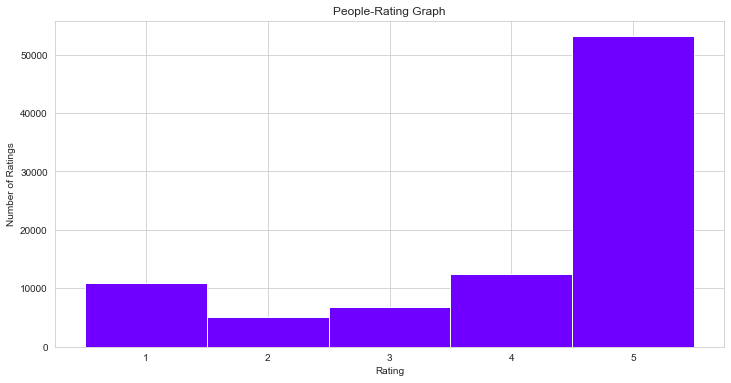

In [96]:
df["rating"].hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5], figsize=(12,6), grid=True, color="#6f00ff")

plt.title("People-Rating Graph")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()

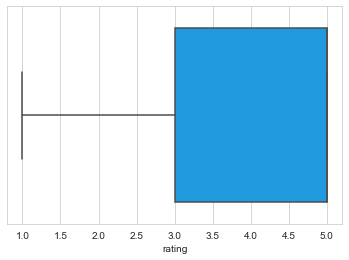

In [97]:
sns.boxplot(x="rating", data=df, whis=5, color="#00a2ff");

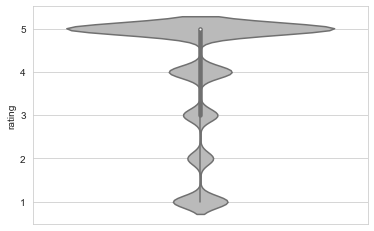

In [98]:
sns.violinplot(y="rating", data=df, bw=0.1, color="#bababa");

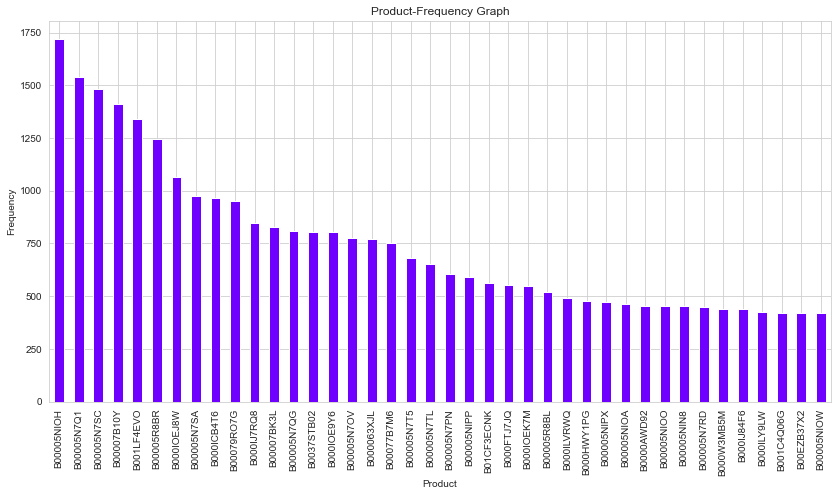

In [99]:
df['product_id'].value_counts().nlargest(40).plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")

plt.title("Product-Frequency Graph")
plt.xlabel("Product")
plt.ylabel("Frequency")
plt.show()

In [100]:
df.corr()

,rating,verified
rating,1.000000,0.166469
verified,0.166469,1.000000


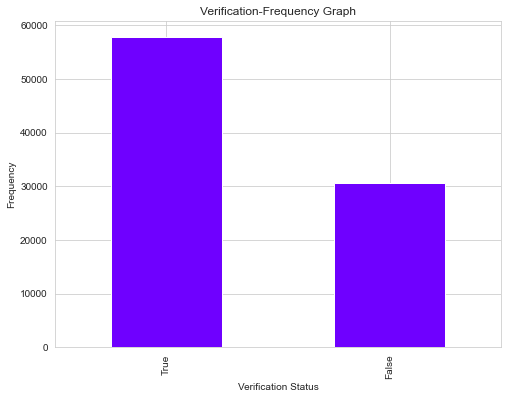

In [101]:
df.verified.value_counts().plot(kind='bar', figsize=(8,6), grid=True, color="#6f00ff")

plt.title("Verification-Frequency Graph")
plt.xlabel("Verification Status")
plt.ylabel("Frequency")
plt.show()

In [102]:
df_verify = df.dropna()

In [103]:
df_verify.shape

(23769, 7)

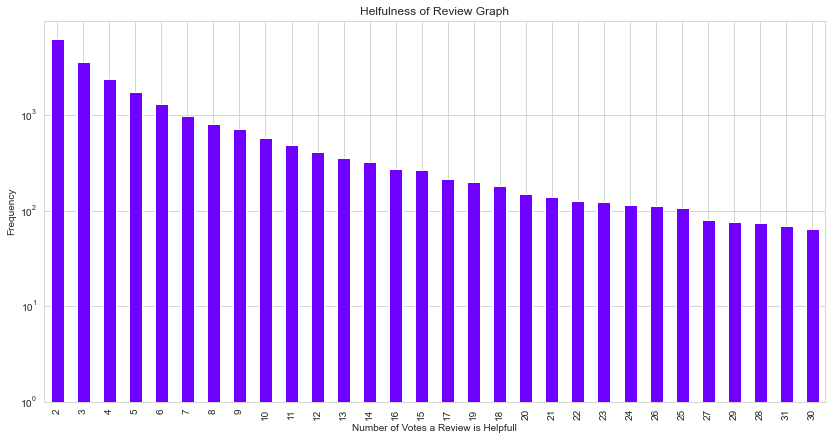

In [106]:
df_verify['vote'].value_counts().nlargest(30).plot(kind='bar', log=True, figsize=(14,7), grid=True, color="#6f00ff")

plt.title("Helfulness of Review Graph")
plt.xlabel("Number of Votes a Review is Helpfull")
plt.ylabel("Frequency")
plt.show()

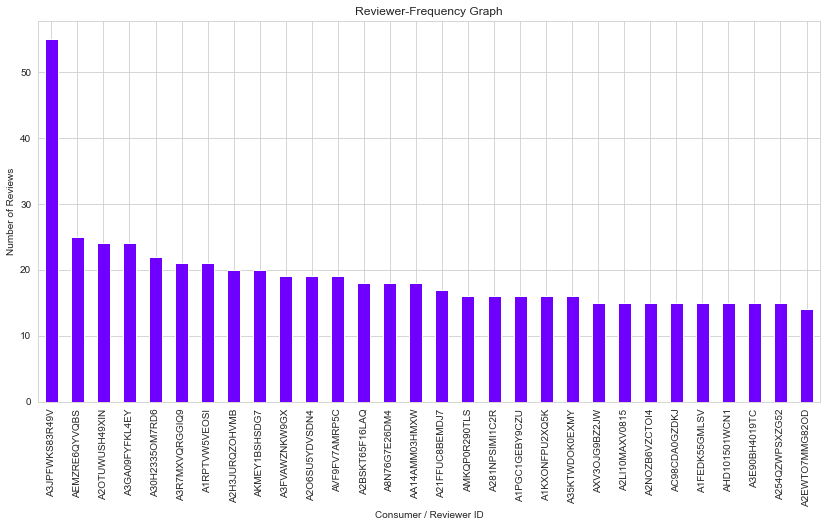

In [110]:
df['reviewerID'].value_counts().nlargest(30).plot(kind='bar', figsize=(14,7), grid=True, color="#6f00ff")

plt.title("Reviewer-Frequency Graph")
plt.xlabel("Consumer / Reviewer ID")
plt.ylabel("Number of Reviews")
plt.show()